# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

# **Install Modules**

Optional code to install all used modules in the below code if running it does not work. I have included this as I am away and was not able to test the code on a cluster/University PC as we were told too, and my internet is so spotty I keep getting errors trying to launch the virtual desktop. I was also worried about collusion accusations if I sent my files to a friend in leeds to test them. 

In [345]:
import subprocess
import sys
#below code creates a function that when called it initiates the system executable to run the code =m pip install <package>.
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
#List of all modules/packages used within the coursework code. For use with above function install
modules = ['pandas','matplotlib','numpy','scipy','seaborn','scikit-learn','tabulate','termcolor']

for x in modules:
    install(x)


# **Importing of all modules/libraries used throughout the exercises**

In [346]:
#Exercise 1
import os
import pandas as pd
import csv
from matplotlib import pyplot as plt
import numpy as np
import random
import scipy 
from scipy.stats import pearsonr
import seaborn as sns

#Exercise 2
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

#Exercise 3
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV

#Exercise 4
from tabulate import tabulate
from termcolor import colored

#Exercise 5
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

#Exercise 6
from sklearn.metrics import accuracy_score

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

correlations to each other. (5 marks)

In [347]:
import os
import pandas as pd
import csv

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

#opening the csv and saving as a Dict
with open(training_data_path) as TrainD:
    td_dict = csv.DictReader(TrainD,delimiter=",")

#Saving the csv files using pandas as Data Frames
#TD = Training Data
TD = pd.read_csv(training_data_path)
#TP = Target path, I won't lie when I named this I meant to name it TT for training target but didn't for some reason
TP = pd.read_csv(training_targets_path)


#Just in case I needed just the descriptions without the feature titles, code below sorts through the features & their descriptions below, splits & cleans up the strings, then sorts each into it's own index inside a list
#adding the descriptions to the features in the data frames for use as titles in the histograms
data_points = """avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

studyPerCap: People who study per Capita (I think, no desc given)

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county """
data_points_split = data_points.splitlines()

#cleaning up the string
for x in data_points_split:
    if x == '':
        data_points_split.remove(x)
#Adds the cleaned up descriptions into the list DP_desc
DP_desc = []
for x in data_points_split:
    DP_desc.append(x.split(':')[1])

#List of Feature titles - Done manually, but redid below
#keys = ["avgAnnCount", "avgDeathsPerYear","incidenceRate","medIncome","popEst2015","povertyPercent","studyPerCap","MedianAge","MedianAgeMale","MedianAgeFemale","AvgHouseholdSize","PercentMarried","PctNoHS18_24","PctHS18_24","PctSomeCol18_24","PctBachDeg18_24","PctHS25_Over","PctBachDeg25_Over","PctEmployed16_Over","PctUnemployed16_Over","PctPrivateCoverage","PctPrivateCoverageAlone","PctEmpPrivCoverage","PctPublicCoverage","PctPublicCoverageAlone","PctWhite","PctBlack","PctAsian","PctOtherRace","PctMarriedHouseholds","BirthRate"]

#Creates a list containing all the features keys/titles/labels 
keys = []
for x in TD:
    keys.append(str(x))

#Finds available figure styles for use
#print(plt.style.available)

In [348]:
#To show a visualisation of the data for quick comparison between it and the histograms below
TD.head(10)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469
5,110.0,54,502.9,46927,14327,14.1,0.0,44.5,43.4,45.4,...,47.4,42.5,42.4,23.1,98.174779,0.400996,0.373341,0.013827,54.140334,4.019074
6,93.0,44,461.6,30835,16106,26.4,0.0,38.4,36.1,41.1,...,32.2,26.8,42.4,27.7,43.367534,54.507145,0.122145,0.842800,40.597656,4.429861
7,19.0,7,527.4,51961,2272,10.9,0.0,48.5,49.3,48.0,...,54.7,33.5,35.1,14.5,89.973845,0.000000,0.087184,0.217960,57.926221,16.455696
8,120.0,49,385.4,40680,32623,20.6,0.0,33.8,33.5,34.2,...,NaN,38.4,33.4,21.0,74.567628,9.805548,0.814057,12.346020,56.887487,6.467920
9,183.0,77,456.9,60121,34602,11.5,0.0,43.7,42.8,44.4,...,51.9,46.1,30.2,14.3,78.388160,16.674513,0.517860,1.894898,58.258633,5.015547


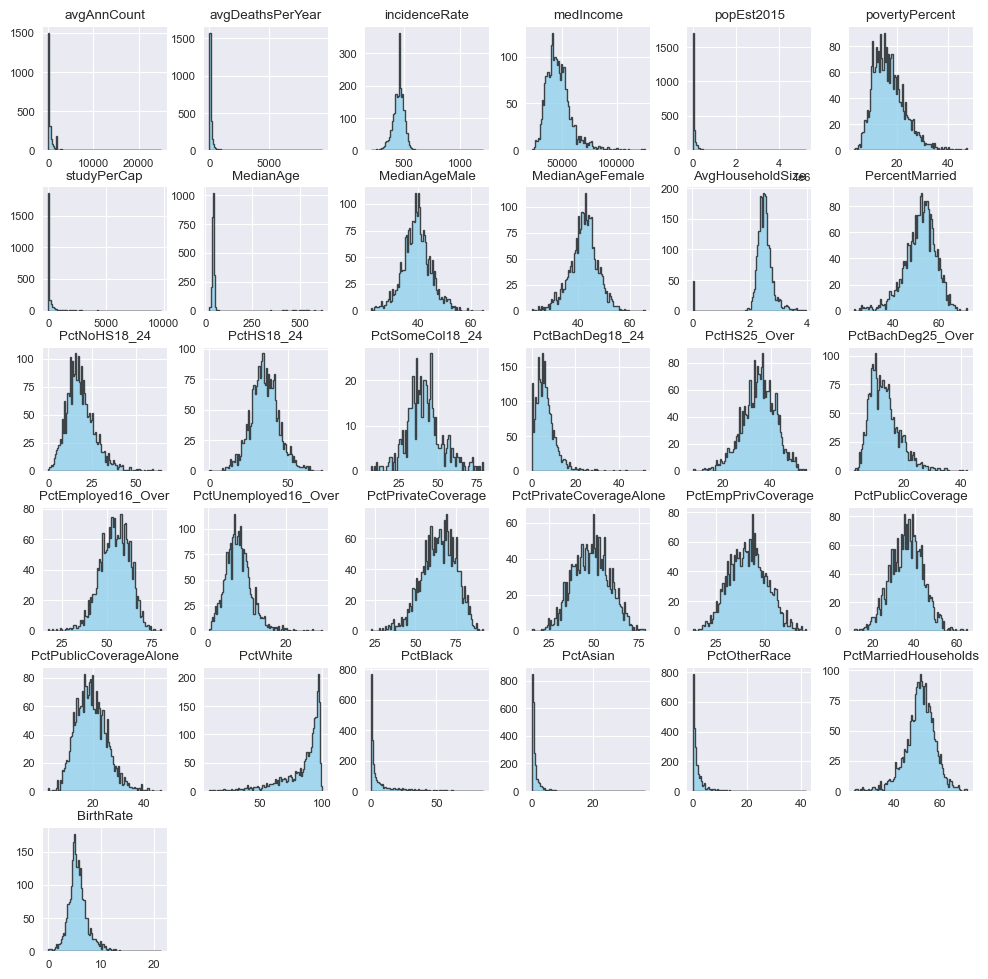

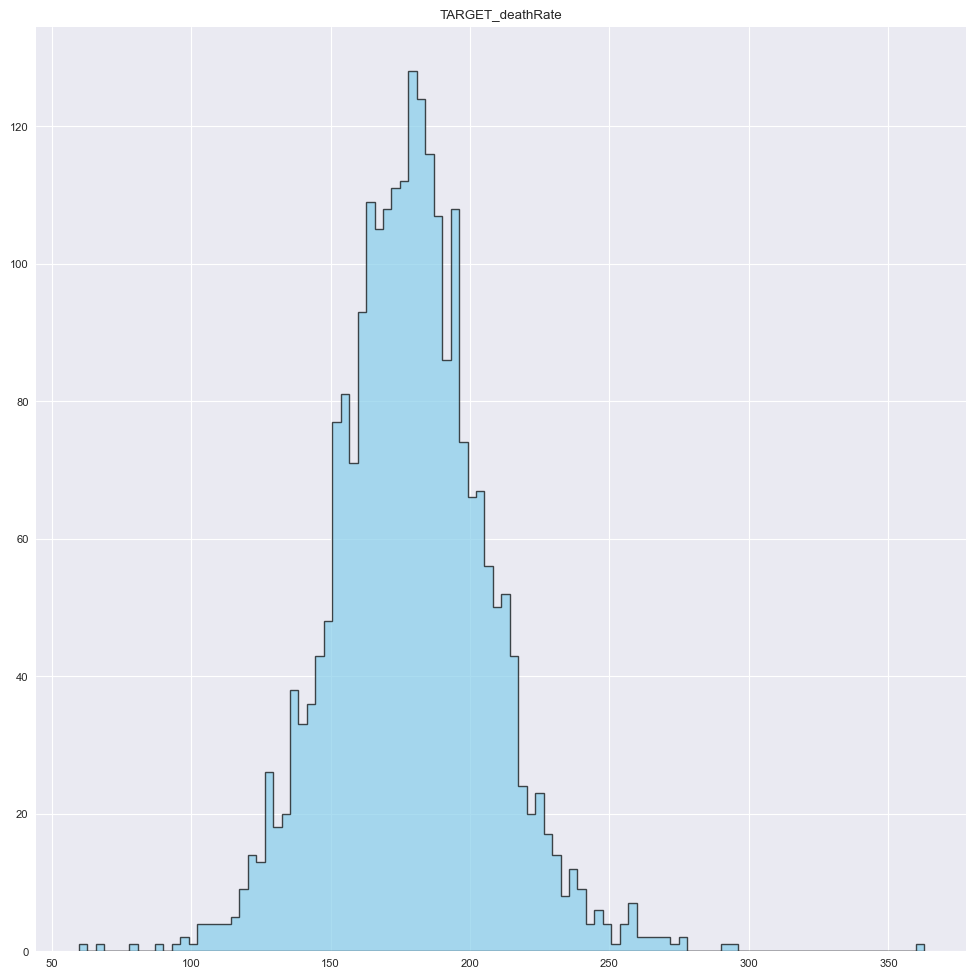

In [349]:
#list of imported modules/Libraries
import pandas as pd
from matplotlib import pyplot as plt
import csv 
import numpy as np
import random
import scipy 
from scipy.stats import pearsonr
import seaborn as sns

plt.style.use('seaborn-v0_8-paper')

#I wrote all the below code unncessarily as I learnt (due to the stress I wasn't able to sleep for weeks, and completely forgot about pandas and it's uses)
"""data = []
/"/"/"skips all iterations in x range but first, fixed by imbedding the set in td_dict loop into a function then creating a loop with that function inside as I couldn't figure out why it'd skip the set in td_dict loop after the initial run of the loop
with open(training_data_path) as TrainD:
    td_dict = csv.DictReader(TrainD,delimiter=",")
    for x in range(1,3):
        data=[]
        print(data)
        for set in td_dict:
            print("test")
            data.append(set[keys[x]])
            print("test2")
        print(data)/"/"/"
#fix for set in td_dict: on all but first iteration skip. Feeds each of the 31 sets of data into the data list one by one to be used to produce the histograms
def histogram(count):
    with open(training_data_path) as TrainD:
        td_dict = csv.DictReader(TrainD,delimiter=",")
        
        data=[]
        #print(data)
        for set in td_dict:
            #print("test")
            data.append(set[keys[x]])
            #print("test2")
        return data

#feeding target into list
with open(training_targets_path) as Target:
    T_dict = csv.DictReader(Target)
    target_data=[]
    for Tset in T_dict:
        target_data.append(Tset["TARGET_deathRate"])


#I tried to create stacked histograms to make the comparison and identification of outliers more much easier however I ran into issues with stacking which I did not have the time to figure out.
#combined histogram of all the data sets
#data_full = []
for x in range(0,30):
    #data_full += histogram(x)
    #plt.hist(target_data,bins=486,label="Death Rate Target",color="black",histtype="bar",alpha=0.5,align="left",range=(0,5000))
    plt.hist(histogram(x),801,label=keys[x],histtype="bar",stacked=True,alpha=(0.5),color=(random.randint(1,9)/10,random.randint(1,9)/10,random.randint(1,9)/10),align="mid")
    plt.legend()
    #plt.figure(edgecolor="black")
    plt.xlabel("X-Axis - Linear Scale",size=14)
    plt.ylabel("Y-Axis - Log Scale",size=14)
    plt.yscale("linear")
    plt.xscale('linear')
    plt.subplots_adjust(right=2)
    #plt.hist(target_data,1219,label="Target: Death Rate",histtype="barstacked",alpha=(0.3),color="Red",align="mid")
    plt.title("Full Combined Data Set Histogram")
plt.show()
plt.savefig(keys[x])

#Individual histograms
for x in range(0,30):
    #data_full += histogram(x)
    #plt.hist(target_data,bins=486,label="Death Rate Target",color="black",histtype="bar",alpha=0.5,align="left",range=(0,5000))
    plt.hist(histogram(x),801,label=keys[x],histtype="bar",stacked=True,alpha=(0.5),color=(random.randint(1,9)/10,random.randint(1,9)/10,random.randint(1,9)/10),align="mid")
    plt.legend()
    #plt.figure(edgecolor="black")
    plt.xlabel("X-Axis - Linear Scale",size=14)
    plt.ylabel("Y-Axis - Linear",size=14)
    plt.yscale("linear")
    plt.xscale('linear')
    plt.subplots_adjust(right=2)
    #plt.hist(target_data,1219,label="Target: Death Rate",histtype="barstacked",alpha=(0.3),color="Red",align="mid")
    plt.title("Histogram of "+keys[x])
    plt.show()
    plt.savefig(keys[x])"""
#all the above code was used to try simulate what the code before I went back and had a refresher on code as I completely forgot most things we learnt this year due to sleeplessness & stress. Below achieves by using much better techniques and libraries like Data Frames

#plotting of all features in a table of histograms to easier total visual comparison
TD.hist(bins=100,figsize=(12,12), edgecolor = 'black', color='skyblue', histtype = 'stepfilled', linewidth = 1, alpha = 0.7)
plt.show()
plt.close()
#Histogram of Target
TP.hist(bins=100,figsize=(12,12), edgecolor = 'black', color='skyblue', histtype = 'stepfilled', linewidth = 1, alpha = 0.7)
plt.show()
plt.close()

#iterates through each index of the list keys, using the key/title to plot, manipulate, show and then save individual histograms of each feature for use in finer detail visual comparison
for x in keys:
    
    #plots histogram with a randomised colour (minimsed the possiblity of yellow popping up as it hurts my eyes), step type histogram and display the title
    plt.hist(TD[x],bins=1000, align="mid", edgecolor = 'black',color=(random.randint(1,9)/10,random.randint(1,5)/10,random.randint(1,9)/10),stacked=True,alpha=0.8)
    
    #Adds the title to the histogram from the corresponding entry in the data_points_split list whose index is given by returning which 0-30 feature it is currently creating the histogram for by using x in keys (which returns the location inside keys which corresponds to the title in data_points_split)
    plt.title(data_points_split[(keys.index(x))])   
    
    #Adds the x and y axis labels and adjusts their size to font 14
    plt.xlabel("X-Axis - Data Value",size=14)
    plt.ylabel("Y-Axis - Frequency in Data Frame",size=14)
    
    #this stretches the histogram to the right to make it easier to visually see the data by a factor of 1.5
    plt.subplots_adjust(right=3,top=1.5)   
    
    #To show individual histograms for each feature, and/or the scatter plots, remove the below # from plt.show & plt.close. If you wish to save these, then remove the # from plt.savefig

    #Displays current plotted histogram
    #plt.show()
    
    #saves the histogram as 'num - name' where number is the order of histograms created/the order in which the data is column wise within the csv file
    #plt.savefig(fname=(str(keys.index(x)+1)+' - '+x+" - Histogram"))
    #plt.close()    

    #scatter plot versions of the histograms if they are preferableif you want them 
    #plt.scatter(y=TD[x],x=TP,color=(random.randint(1,9)/10,random.randint(1,5)/10,random.randint(1,9)/10))
    #plt.subplots_adjust(top=1.5)
    #plt.subplots_adjust(right=2)
    #plt.xlabel("X-Axis - "+x)
    #plt.ylabel("Y-Axis - Target Death Rate")
    
    #Displays the currently plotted scatter plot
    #plt.show()
    #plt.savefig(fname=(str(keys.index(x)+1)+' - '+x+" - Scatter Plot"))
    plt.close()
#There seems to be several outliers in almost all of the Data Frames with several single data points appearing outside the general range of the majority of data points. There are also massive spikes in a couple of data sets such as in the first feature avgAnnCount, with a spike around 2000, and in the incidentRate around 400-500 (which I believe are the 1962.667684 & 453.5494221 values on inspection in the csv file which makes sense as more incidents means the average annual count would also increase)



## *Initial observations - Training Data & Histograms*
I noticed several observations while trawling through the data files and also upon inspection of the data files, which are as follows:

- Several extreme value dips/spikes within feature data sets, such as in MedianAge where 26 of the entries were above 100, which I found using formatting options within excel and shall confirm using code below, and did not reflect the average between the MedianAgeMale and MedianAgeFemale feature data sets as it should.

- There is bias present within the data, specifically to do with the features accounting data of the race of those with Cancer
  - This bias is skewed towards those identifying as white
    - Which might be even further biased as the total of each of the feature data sets to do with ethnicity hardly ever amounted to one hundred percent.

- Feature Data sets which were incomplete or had several missing data entries, such as PctSmeCol18_24

## *Cleaning up of Data*
As my above observations showed, there are several features with incorrectly formatted data, as well as several missing entries and as such I believed it best to go through and tidy up said data.

In [350]:
missing_data = []
headers = ['Feature','Number of Data Values','Number of Missing Data Values']
for x in TD:
	if TD[x].count() < 2438:
		missing_data.append([x,TD[x].count(),(2438-TD[x].count())])
Data_check = pd.DataFrame(missing_data, columns=headers)
Data_check.head()




,Feature,Number of Data Values,Number of Missing Data Values
0,PctSomeCol18_24,609,1829
1,PctEmployed16_Over,2319,119
2,PctPrivateCoverageAlone,1955,483


This shows that PctSomeCol18_24, PctEmplyed16_Over and PctPrivateCoverageAlone are all incomplete, with a corresponding 1829, 119 and 483 data entries missing. 

## *Scatter Matrices & Correlation*

In [351]:

#Correlation Code

#correlation, initilly used #correlation code in the large """code""" block at the bottom but then when I hovered over corr it reminded me about corrwith
Corr_data = pd.DataFrame.corrwith(TD,TP['TARGET_deathRate'])

    ##pd.Series.hist(Corr_data,bins=Corr_data.count(),label=Corr_data,histtype='barstacked',align='mid',alpha=0.5)
    ##plt.show()
    #print(Corr_data)
    #print(Corr_data.sort_values())

top5_Corr=[(Corr_data.sort_values(key=abs))[-6:-1]]
    #print(top5_Corr)
    #scatter plot matrix using top 5 correlating
    #print(str(pd.Series.keys(top5_Corr)))
    #print(TD.pop(top5_Corr(',')[0]))

#converts the correlation data from list[series] to a string, then splits the string into separate lists for each data point and saves them into the list top5_strings which will then be used to collect the top 5 features data from the dataset TD
top5_string = str(top5_Corr)
top5_strings = top5_string.splitlines()

#collecting and saving the top 5 features from TD into TD_top5 (with target data excluded) and TD_top5_Target (with target data included)
TD_top5 = pd.DataFrame()
TD_top5_Target = pd.DataFrame()
    
#loops through the column labels and checks if it matches one of the top 5, and then if it does it will save said dataset into the top5 data frames
for x in keys:
    if x in top5_string:
        TD_top5[x] = TD[x]
        TD_top5_Target[x] = TD[x]

#adds a new column containing the data from the Target data frame to the top5_Target data frame
TD_top5_Target['TARGET_deathRate'] = TP.TARGET_deathRate



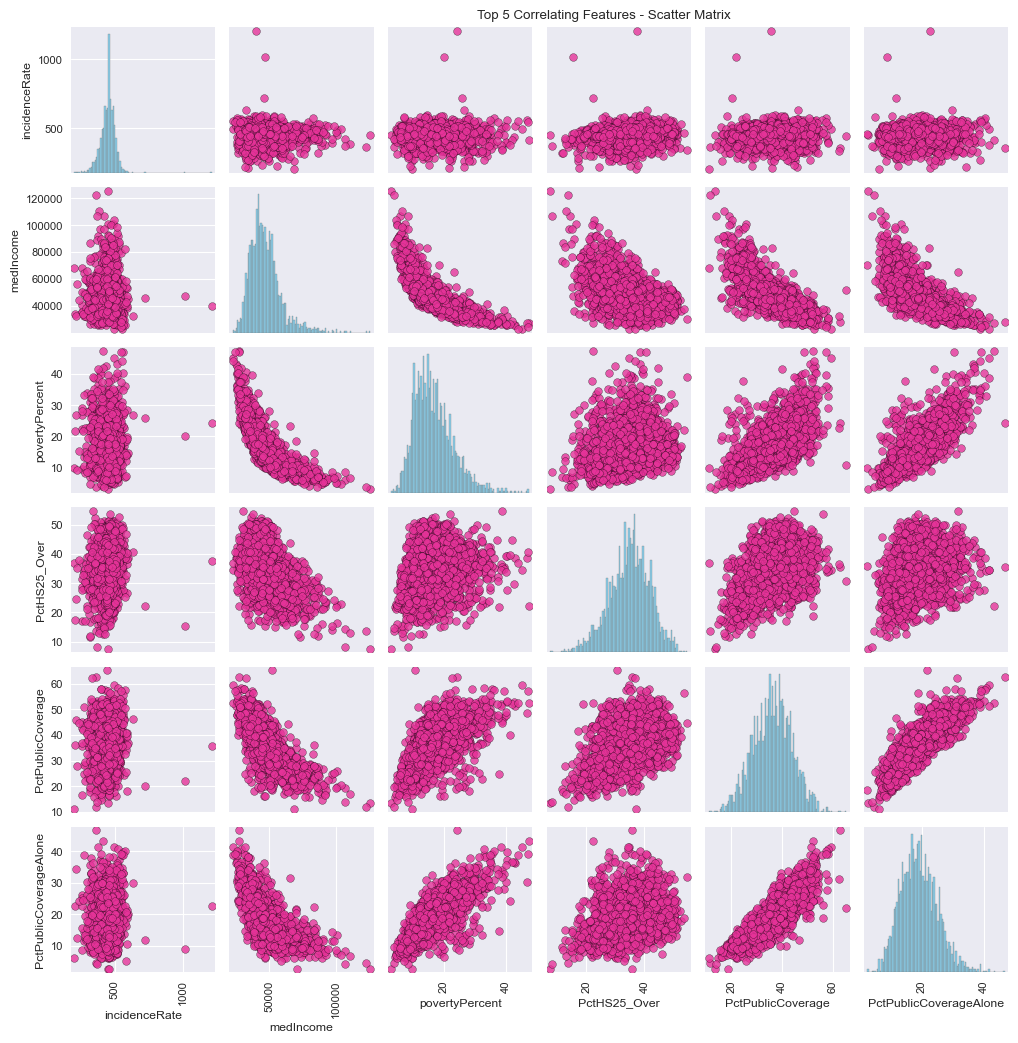

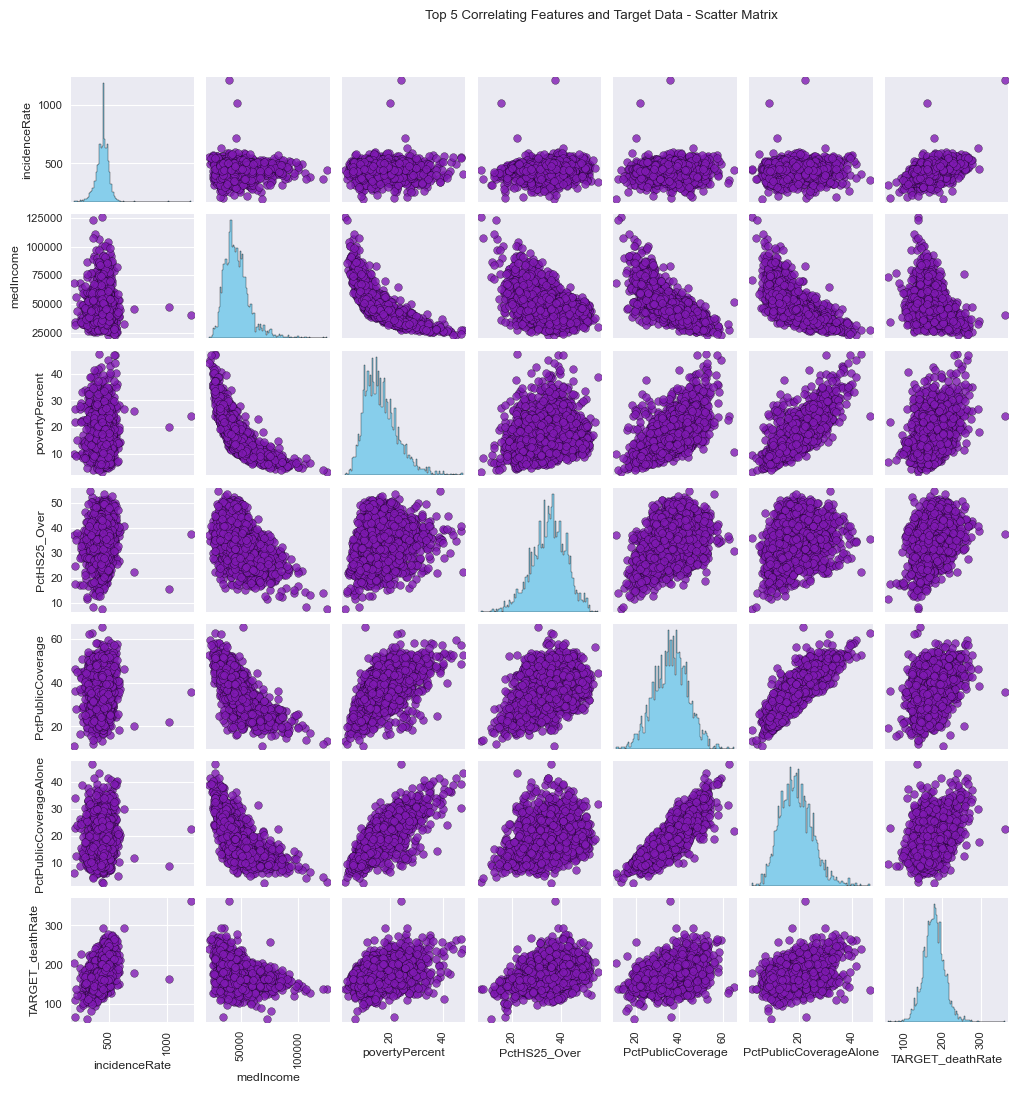

In [352]:

#Scatter Matrices Code

#Scatter Matrix without Target Data Column
pd.plotting.scatter_matrix(TD_top5,marker='¤',grid=True,color=(random.randint(5,9)/10,random.randint(1,5)/10,random.randint(6,9)/10),alpha=0.8,figsize=(5,5), edgecolor = 'black', hist_kwds={'color':'skyblue','histtype':'barstacked','edgecolor':'grey','bins':100})
plt.style.use('seaborn-v0_8-darkgrid')
plt.title("Top 5 Correlating Features - Scatter Matrix",y=6.5,x=-1.8)
plt.subplots_adjust(right=2,top=2,wspace=0.1,hspace=0.1)
plt.show()
plt.savefig('Top 5 Correlating Features - Scatter Matrix')
plt.close()

#Scatter Matrix with Target Data Column
pd.plotting.scatter_matrix(TD_top5_Target,marker='¤',grid=True, color=(random.randint(5,9)/10,random.randint(1,5)/10,random.randint(6,9)/10),alpha=0.8,figsize=(5,5), edgecolor = 'black', hist_kwds={'color':'skyblue','histtype':'stepfilled','edgecolor':'black','bins':100})
plt.style.use('seaborn-v0_8-darkgrid')
plt.title("Top 5 Correlating Features and Target Data - Scatter Matrix",y=8,x=-2.3)
plt.subplots_adjust(right=2,top=2,wspace=0.1,hspace=0.1)
plt.show()
plt.savefig('Top 5 Correlating Features and Target Data - Scatter Matrix')
plt.close()


## *Lines of Regression*

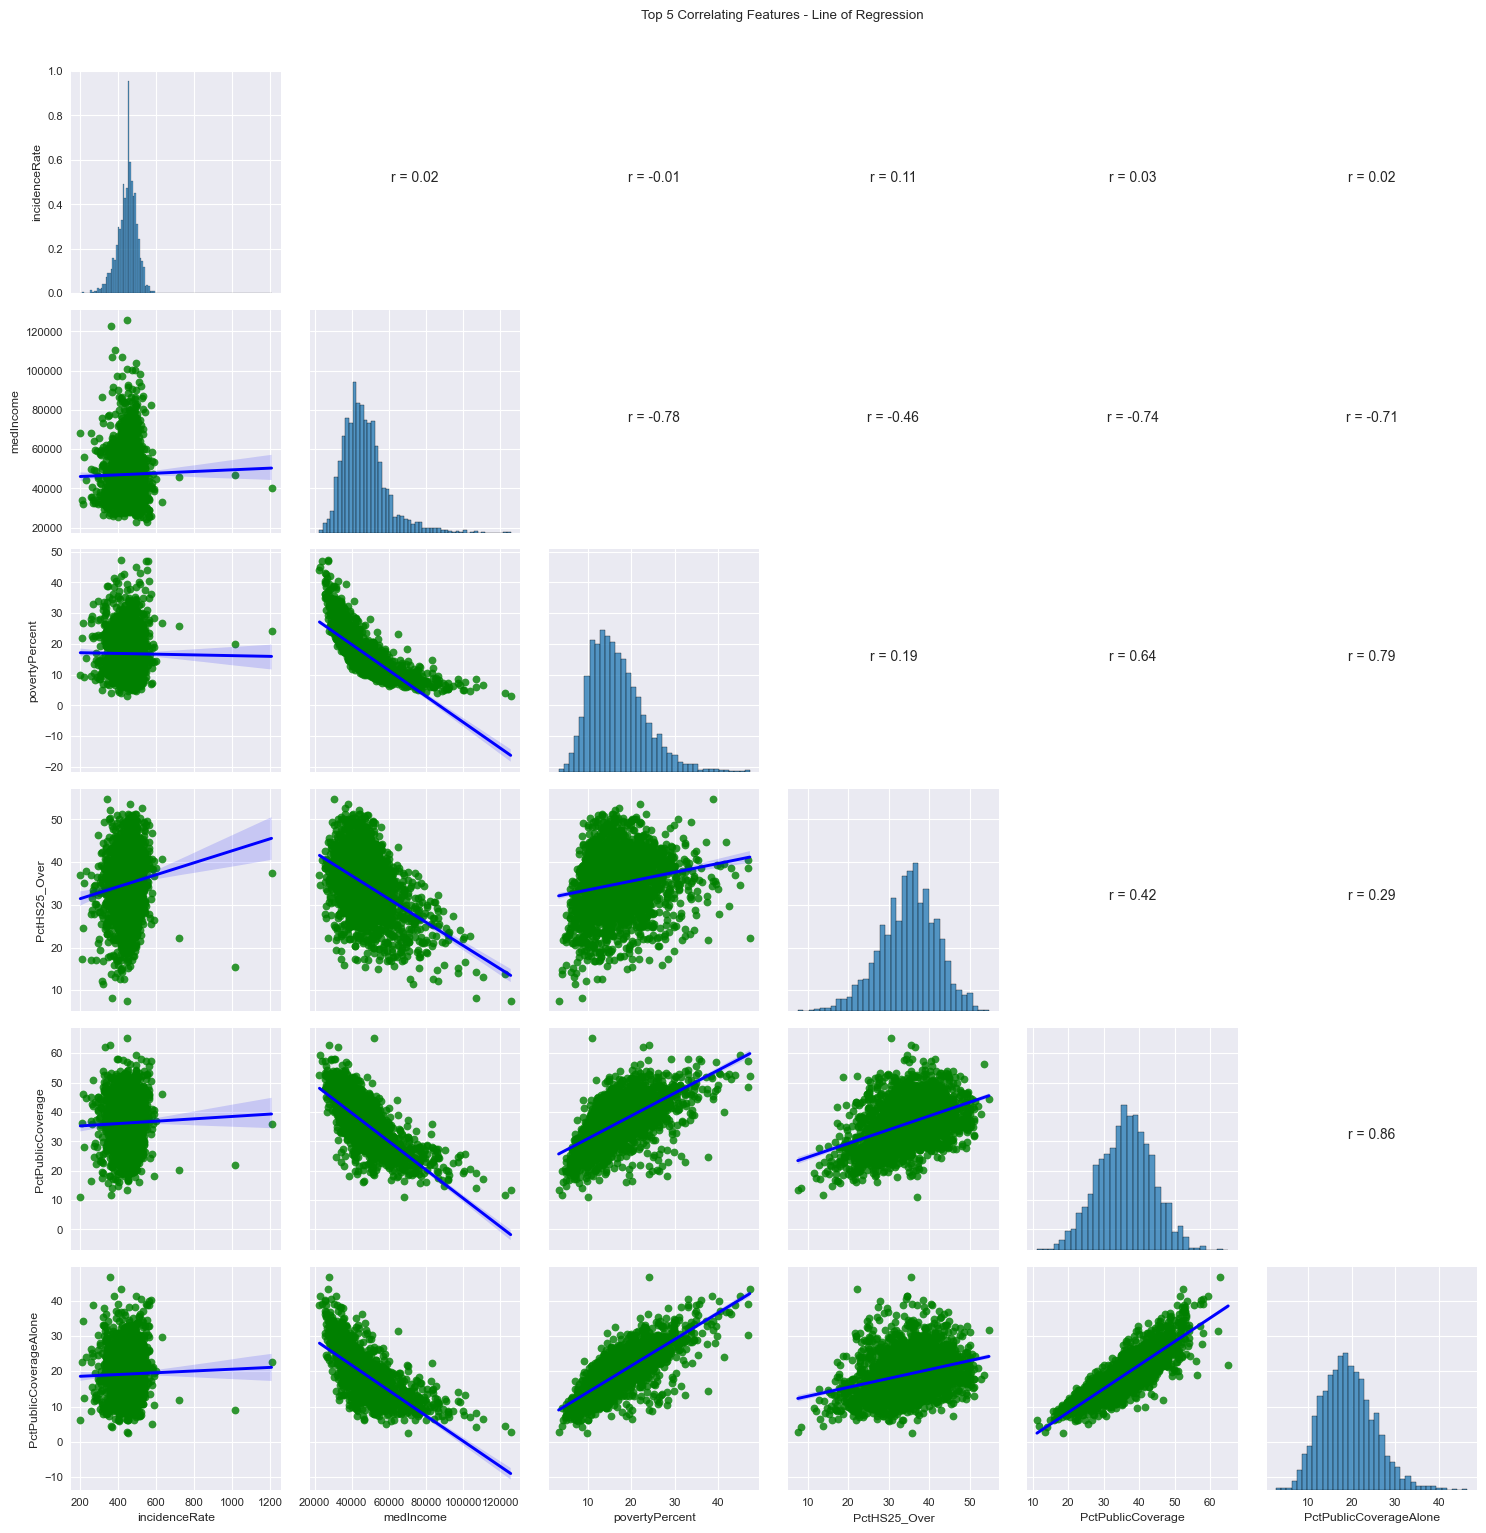

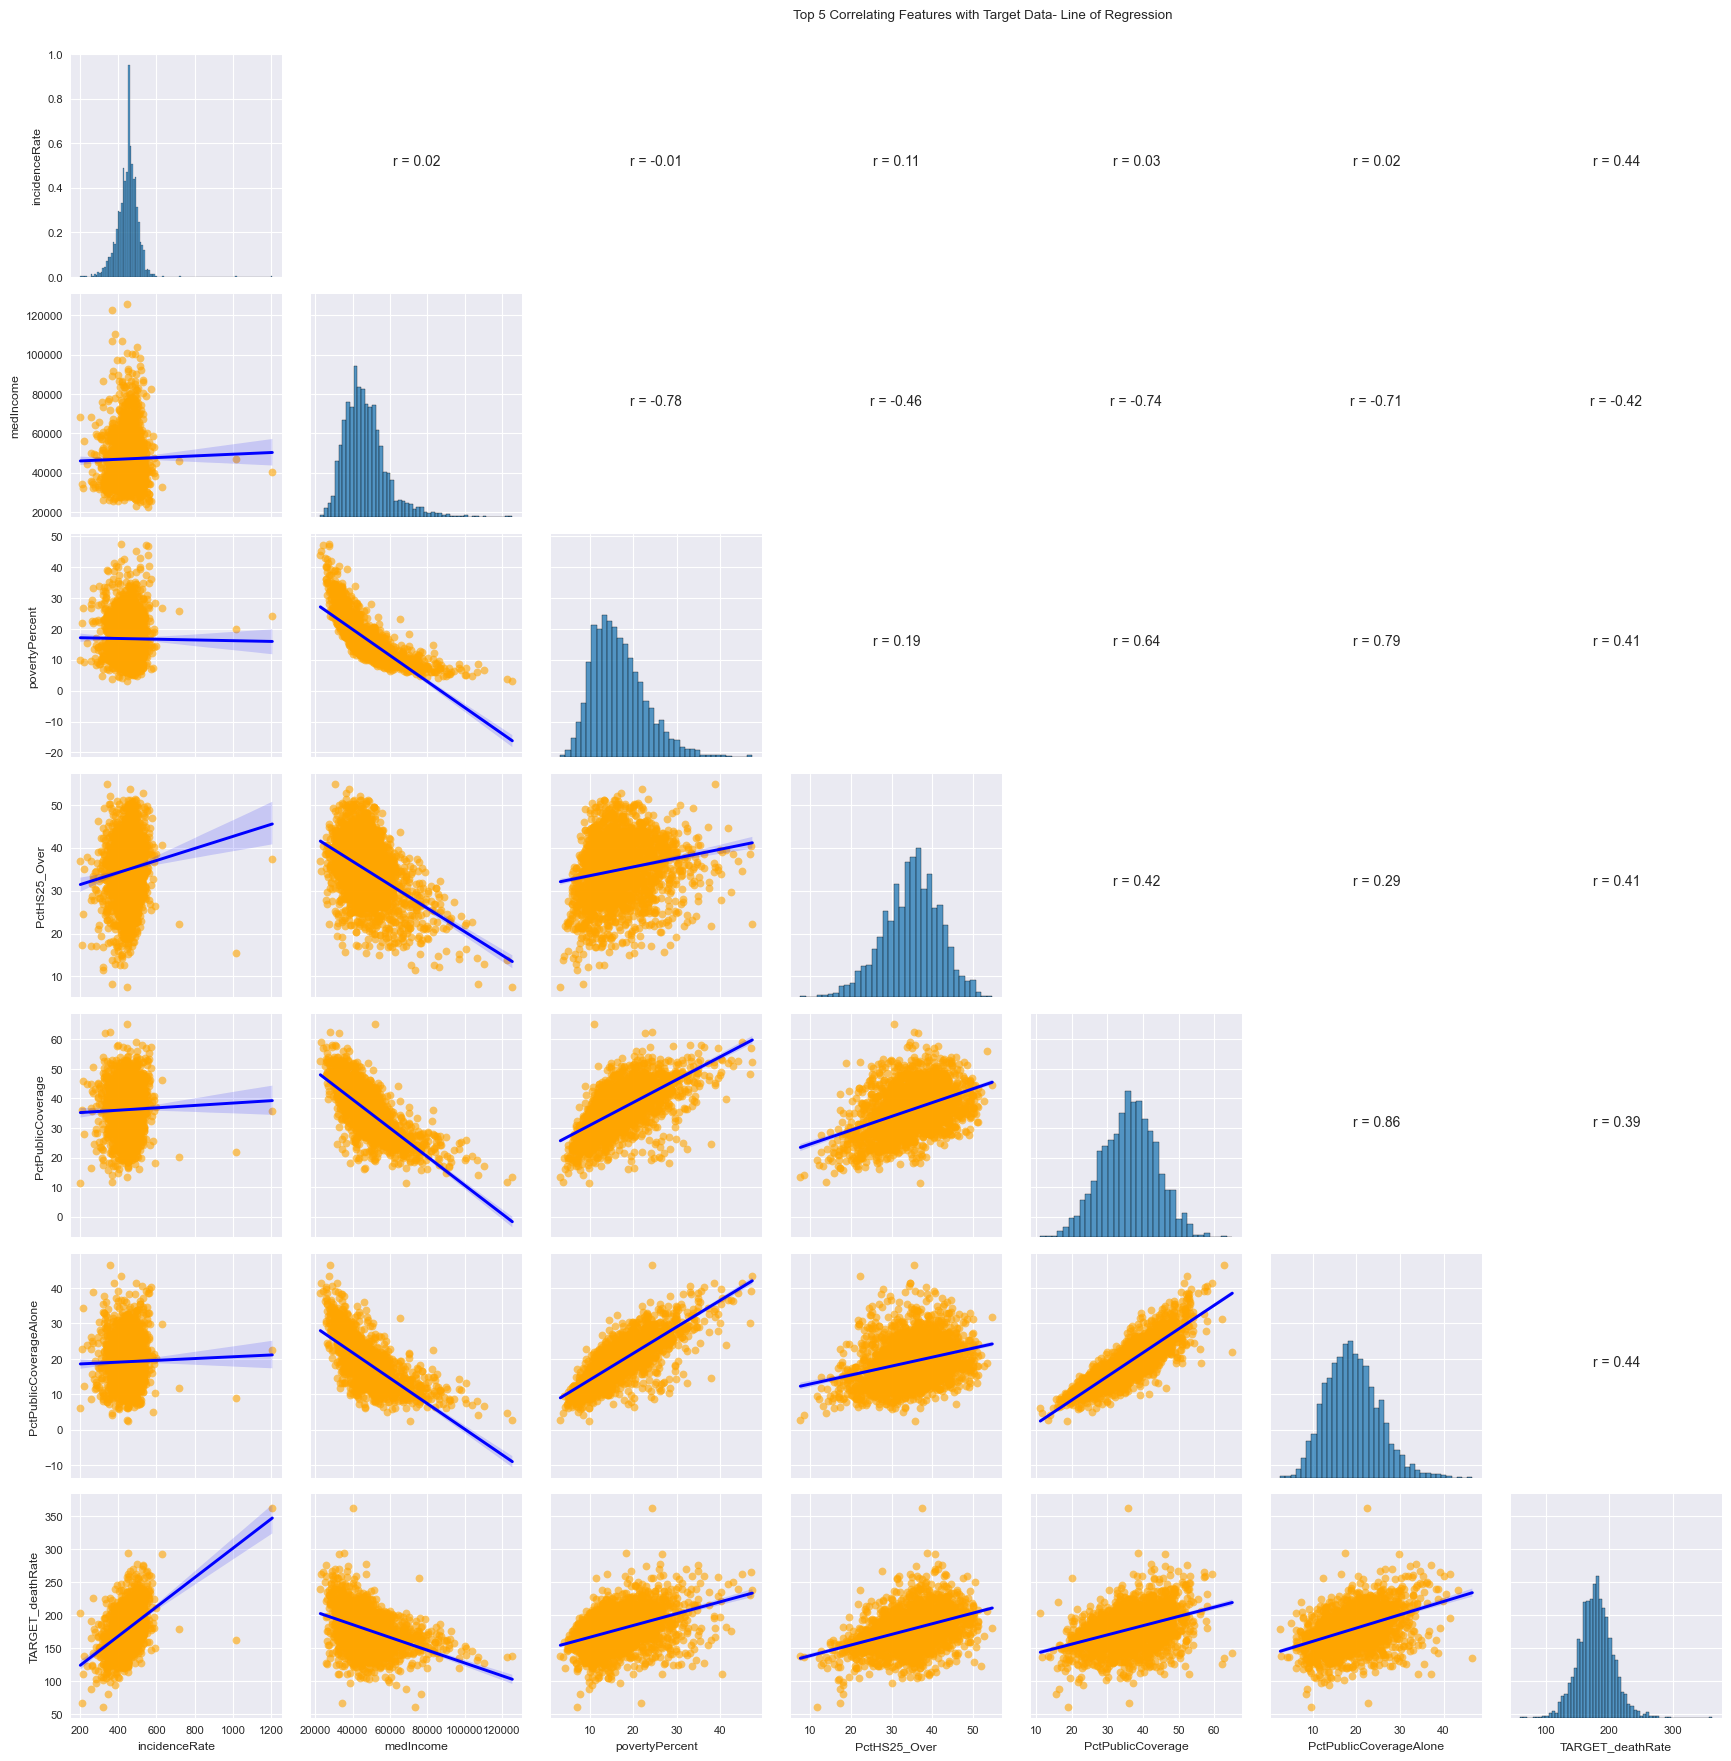

In [353]:
#Line of Regression Code

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

#line of regression plot using seaborn to confirm/back-up visual correlations/relationships between features
#without target
reg = sns.PairGrid(TD_top5)
reg.map_diag(sns.histplot)
reg.map_lower(sns.regplot,line_kws={'color':'blue','alpha':1},color='green')
reg.map_upper(reg_coef)
plt.style.use('seaborn-v0_8-darkgrid')
plt.title("Top 5 Correlating Features - Line of Regression",loc='center',y=5.5,x=-2.3)

#Shows the Line of Reg, saves the figure and then closes the fig
plt.show()
plt.savefig("Top 5 Correlating Features - Line of Regression")
plt.close()


#with target
reg_T = sns.PairGrid(TD_top5_Target)
reg_T.map_diag(sns.histplot)
reg_T.map_lower(sns.regplot,line_kws={'color':'blue','alpha':1},scatter_kws={'color':'orange','alpha':0.6,'edgecolor':'white','edgecolor':'black'})
reg_T.map_upper(reg_coef)
plt.style.use('seaborn-v0_8-darkgrid')
plt.title("Top 5 Correlating Features with Target Data- Line of Regression",loc='center',y=6.5,x=-2.5)

#Shows the Line of Reg, saves the figure and then closes the fig
plt.show()
plt.savefig("Top 5 Correlating Features with Target Data- Line of Regression")
plt.close()



## *Comments before fix*
## *I had forgotten to include negative correlation, which I correct but wanted to keep these observations of the original top 5 positive correlating features*
With Regards to sets of features that show correlation to each other, visually (and then using a line of regression to confirm these) the feature sets I noticed are, with r being the coefficient of regression:

- r = 0.86 
  - PctpublicCoverageAlone & PctpublicCoverage 
    - This makes sense as these features and their data are incredible similar, with both including those who have government provided healthcare coverage with the only difference with PctpublicCoverageAlone not including those with other health care plans

- r = 0.79 
  - PctpublicCoverageAlone & povertyPercentage 
    - Again this makes sense as those who are poor most likely cannot afford extra private health care, thus as the percentage of the population that is poor increases so will the those who rely on government provided healthcare alone

- r = 0.64 
  - Pctunemployed16_Over & povertyPercentage 
    - There is a trend it seems with your chance to survive cancer and how much money you have (which translates into the level and quality of healthcare you can afford) as these features again make sense, as if the number of unemployed over 16 rises logically and evidentely the percentage considered poor in the population would also increase

- r = 0.64 
  - PctpublicCoverage & povertyPercentage 
    - While this did show a trend, the correlation was not as strong and I believe this is due to it incuding private (not just government assisted health care) which increased the chances of survival. This reinforces the above correlations in which unemployement, poverty and a lack of adequate health care all lead to an increase risk of dying from cancer




## *Added Comments after fix*
With regards to sets of features that show correlation to each other, visually (and then using linear regression was then confirmed) the feature sets I noticed are, with r indicating the coefficient of regression between said features):
- r = 0.86 
  - PctpublicCoverageAlone & PctpublicCoverage 
    - This makes sense as these features and their data are incredible similar, with both including those who have government provided healthcare coverage with the only difference with PctpublicCoverageAlone not including those with other health care plans

- r = 0.79 
  - PctpublicCoverageAlone & povertyPercentage 
    - Again this makes sense as those who are poor most likely cannot afford extra private health care, thus as the percentage of the population that is poor increases so will the those who rely on government provided healthcare alone

- r = -0.78 
  - medianIncome & povertyPercentage 
    - These two features have a negative correlation, which logically makes sense, as when the Median Income increases one would assume that the percentage of people in poverty would decrease as otherwise the median would not be able to increase in the first place (as it can only increase when the lower bound of those with a low income decreases pushing up the median)

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [354]:
#Import all needed modules
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

## **Functions to aid in creation of Pipeline**

In [355]:
def preprocess(data, target):
    d1 = drop(data, target)
    d2 = replace_5std(d1)
    X_train, X_test, y_train, y_test = split_data(d2, target)
    return X_train, X_test, y_train, y_test


# drop columns 
def drop(data, target):
        data_len = len(data.axes[0])

        # Columns that miss more than half of the total number of entries are removed as these lack the ability to be useful for determining correlation between their feature and the target due to lack of data 
        for x in data:
            if data[x].isnull().any():
                if data[x].notnull().sum() < (data_len/2):
                    data = data.drop(x,axis=1)                    
                    print(x, 'has been removed from the pipeline because it misses more than half of the entries.')
            
            # Find columns that have low p-value. P-value is used to see the null hypothesis possiblity which allows us to remove low correlation features as those with a higher than normal p-value mean they statistically have a minimal significance and therefore should be removed from the pipeline
            else:
                if stats.pearsonr(np.squeeze(np.asarray(target)), data_len > 1500 and data[x])[1] > 0.055:
                    data = data.drop(x,axis=1)
                    print(x, 'shows too high of a p-value, meaning low significance, and shall be removed from the pipeline.')

        return data


#Remove and replace data that is at 5 standard deviations, as this data is disrupts our goal of finding correlation between target & feature data
def replace_5std(data):
    for x in data:
            mean = data[x].mean()
            median = data[x].median()
            std = data[x].std()
            
            for entry in data[x]:
                if ((mean - std*5) >= entry) or ((mean + std*5) <= entry):
                    entry = median

    return data


def split_data(data, target):
    #Creates a split between the train data and test data that is 0.7 to 0.3 respectively 
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=1) 
    return X_train, X_test, y_train, y_test


## **Preprocessing the Data**

In [356]:
train_TD, Test_TD, train_TP, test_TP = preprocess(TD, TP)

#Call and return arrays for Target training & testing variable values
train_TP = train_TP.values.ravel()
test_TP = test_TP.values.ravel()

studyPerCap shows too high of a p-value, meaning low significance, and shall be removed from the pipeline.
MedianAge shows too high of a p-value, meaning low significance, and shall be removed from the pipeline.
MedianAgeMale shows too high of a p-value, meaning low significance, and shall be removed from the pipeline.
MedianAgeFemale shows too high of a p-value, meaning low significance, and shall be removed from the pipeline.
PctSomeCol18_24 has been removed from the pipeline because it misses more than half of the entries.


In [357]:
print("The dimension of train is {Train_shape}".format(Train_shape = train_TD.shape))
print("The dimension of test is {Test_shape}".format(Test_shape = Test_TD.shape))

train_TD.head()

The dimension of train is (1706, 26)
The dimension of test is (732, 26)


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
745,98.0,42,455.8,36801,18778,24.0,2.43,50.7,4.8,25.0,...,42.2,33.6,40.6,26.0,68.094984,28.788687,0.266809,1.659552,50.423845,4.350707
1252,126.0,61,442.0,33181,16185,20.3,2.43,58.2,15.3,39.7,...,NaN,27.4,52.2,24.0,96.579171,0.255195,0.716977,0.236967,57.439188,5.886451
917,875.0,327,479.9,46892,203976,18.0,2.75,42.1,8.7,23.6,...,58.3,50.2,29.4,16.0,66.148520,30.583464,1.473127,0.629059,46.865236,5.461320
2043,245.0,87,447.8,58792,53585,10.2,2.95,55.1,21.3,31.3,...,58.0,53.4,30.8,17.2,87.411562,2.211658,1.305454,6.595978,59.523416,5.621302
125,19.0,8,348.6,51201,3348,10.0,2.19,58.9,21.0,30.4,...,58.8,36.3,32.0,9.9,98.814815,0.000000,0.296296,0.000000,53.311258,3.642987


Class to 

In [358]:
class SelectAttributes(BaseEstimator):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [359]:
pipeline = Pipeline([
    ('slc_attribs', SelectAttributes(list[train_TD])),
    ('imputer', KNNImputer(n_neighbors=5, weights="uniform")),
    ('std_scaler', StandardScaler())
])

In [360]:
TD_prep = pipeline.fit_transform(train_TD)    # prepare data for the machine learning model training
cancer_test = pipeline.transform(Test_TD)             # prepare data for the machine learning model testing
TD_prep

array([[-0.37700246, -0.30151906,  0.13878799, ..., -0.0943112 ,
        -0.12751869, -0.64057741],
       [-0.35678652, -0.26277217, -0.10476558, ..., -0.51222972,
         0.94546361,  0.14292043],
       [ 0.18398994,  0.27968433,  0.5641243 , ..., -0.39704308,
        -0.67180061, -0.07397049],
       ...,
       [10.72154995, 11.40004258, -0.82130724, ...,  1.2361193 ,
        -0.64560584, -0.10923831],
       [ 0.96928377, -0.21586803,  0.09906797, ..., -0.26617306,
        -0.30358614,  0.12254296],
       [-0.41310236, -0.35250181,  0.34527906, ..., -0.58184441,
         0.57216244,  1.07595881]])

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [361]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV


In [362]:
def display_performance(model, X_train, X_test, y_train, y_test): 
    # Train prediction
    train_pred = model.predict(X_train)
    train_mse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_score = format(r2_score(y_train, train_pred)*100, '.2f')

    # Test prediction
    test_pred = model.predict(X_test)
    test_mse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_score = format(r2_score(y_test, test_pred)*100, '.2f')

    print('TRAIN: Accuracy: {}%'.format(train_score))           
    print('TRAIN: Root mean squared error:', format(train_mse, '.2f'))   
    print('TEST:  Accuracy: {}%'.format(test_score))           
    print('TEST:  Root mean squared error:', format(test_mse, '.2f'))    

## *Ordinary Least Squares (OLS)*

In [363]:
# Code for Ordinary Least Squares method
lin_reg=LinearRegression()
lin_reg.fit(TD_prep, train_TP)

display_performance(lin_reg, TD_prep, cancer_test, train_TP, test_TP)

TRAIN: Accuracy: 54.59%
TRAIN: Root mean squared error: 18.75
TEST:  Accuracy: 46.23%
TEST:  Root mean squared error: 19.63


## *Lasso & Ridge*
For the Lasso and Ridge regularization, the hyperparameter, lambda, will be tuned by using a cross validation. The LassoCV and RidgeCV will be used to fit the data because they incorporate the $ r^2 $ scoring for the grid search in their model. 


The formula used for the optimisation objective within sklearn for LassoCS is:
$$
L(w) = {\frac{1}{2n}} \sum^n_{i=1} (y_i - Xw)^2 + \alpha \sum^n_{j=1} w
$$

Minimisation of the models weight are done by using the Lasso and Ridge regressions. Training Data may not work as expected on the test data due to overfit through the use of the Linear regression model. On the graph below, it can be seen how the regularized regressions converged to slightly smaller weights compared to the linear model. Despite the small reduction, the performance of Lasso and Ridge is not much higher compared to the linear regression performance.

The optimization objective of RidgeCV inside sklearn can be seen below. By default, the RigdeCV performs efficient Leave-One-Out Cross-Validation which requires positive alphas.
$$
L(w) = \sum^n_{i=1} (y_i - Xw)^2 + \alpha w^2
$$

TRAIN: Accuracy: 54.58%
TRAIN: Root mean squared error: 18.75
TEST:  Accuracy: 46.29%
TEST:  Root mean squared error: 19.62
Best alpha: 0.013985048659677193


(0.00990065624302518, 19.75440629517019, 308.84356009844237, 910.3541289770811)

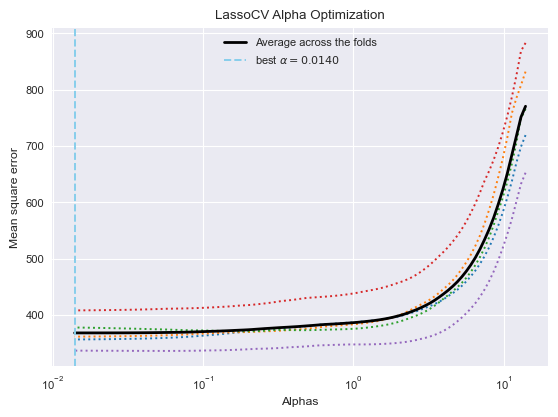

In [364]:
# Code for Lasso
# Lasso Cross validation, 5 cv by default
lasso = LassoCV() 
lasso.fit(TD_prep, train_TP)

lasso_best = Lasso(alpha=lasso.alpha_)
lasso_best.fit(TD_prep, train_TP)

display_performance(lasso_best, TD_prep, cancer_test, train_TP, test_TP)
print('Best alpha:', lasso.alpha_)    

best_lasso_alpha = lasso.alpha_

# Show how the lasso alpha was computed using the error for each fold

# plot the performance of each fold
plt.plot(lasso.alphas_, lasso.mse_path_, ":")

# plot the performance average
plt.plot(lasso.alphas_ ,lasso.mse_path_.mean(axis=-1), color="black", label="Average across the folds", linewidth=2)

# Draw a dashed vertical line at the alpha
alpha_label = "best $\\alpha={:0.4f}$".format(lasso.alpha_)
plt.axvline(lasso.alpha_, color="skyblue", linestyle="--", label=alpha_label)

plt.legend()

plt.title("LassoCV Alpha Optimization")

plt.xlabel("Alphas")
plt.xscale('log')

plt.ylabel("Mean square error")

plt.axis("tight")


TRAIN: Accuracy: 54.53%
TRAIN: Root mean squared error: 18.76
TEST:  Accuracy: 46.34%
TEST:  Root mean squared error: 19.61
Best alpha: 13.513426853707417


(-4.895000000000001, 104.995, 367.576230914502, 371.1586052950805)

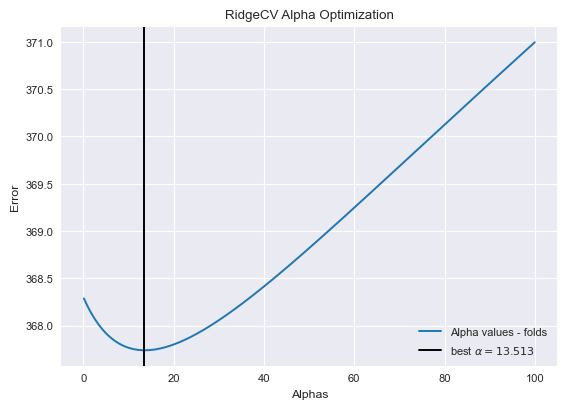

In [365]:
# Ridge regression model
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.linspace(0.1, 100.0, 500)

# Ridge Cross validation
ridge = RidgeCV(alphas=alphas, store_cv_values=True) 
ridge.fit(TD_prep, train_TP)

ridge_best = Ridge(alpha=ridge.alpha_)
ridge_best.fit(TD_prep, train_TP)

display_performance(ridge_best, TD_prep, cancer_test, train_TP, test_TP)
print('Best alpha:', ridge.alpha_)    

# Show how the ridge alpha was computed

# Plot the alpha against the error
plt.plot(ridge.alphas, ridge.cv_values_.mean(0), label="Alpha values - folds")

# Draw line at alpha to depict it
alpha_label = "best $\\alpha={:0.3f}$".format(ridge.alpha_)
plt.axvline(ridge.alpha_, color="black", linestyle="-", label=alpha_label)

plt.legend()
plt.title("RidgeCV Alpha Optimization")
plt.xlabel("Alphas")
plt.ylabel("Error")
plt.axis("tight")

The Lasso and Ridge regressions are used to minimize the weights of the model. The linear regression model may overfit the training data and not work as expected on the test data. While slightly smaller weights are achieved using the Lasso & Ridge regressions, thanks to regularised regressions convering, this does not result in a drastic increase in performance compared to linear regression, due to it being only a small reduction.

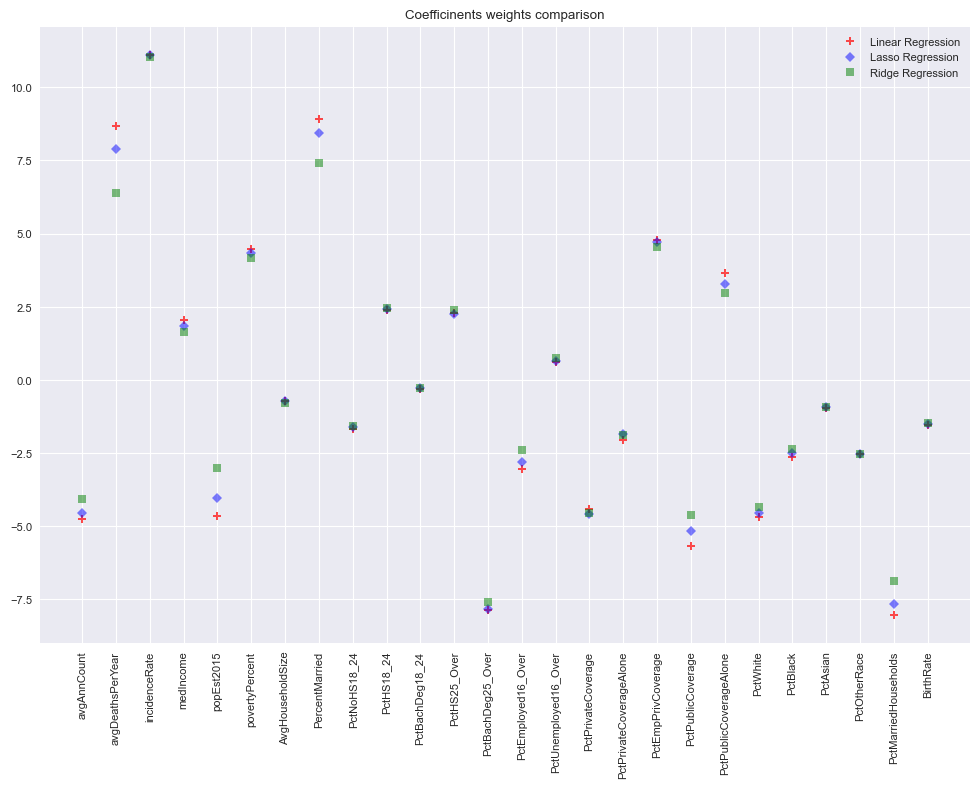

In [366]:
#linear, lasso and ridge model coefficient plot
plt.figure(figsize = (12, 8))
plt.title('Coefficinents weights comparison')
plt.plot(train_TD.columns, lin_reg.coef_, linestyle='none', marker='P', label='Linear Regression', color='red',alpha=0.7)
plt.plot(train_TD.columns, lasso.coef_,   linestyle='none', marker='D', label='Lasso Regression', color = 'blue',alpha=0.5)
plt.plot(train_TD.columns, ridge.coef_,   linestyle='none', marker='s', label='Ridge Regression', color = 'green',alpha=0.5)
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [367]:
from tabulate import tabulate
from termcolor import colored

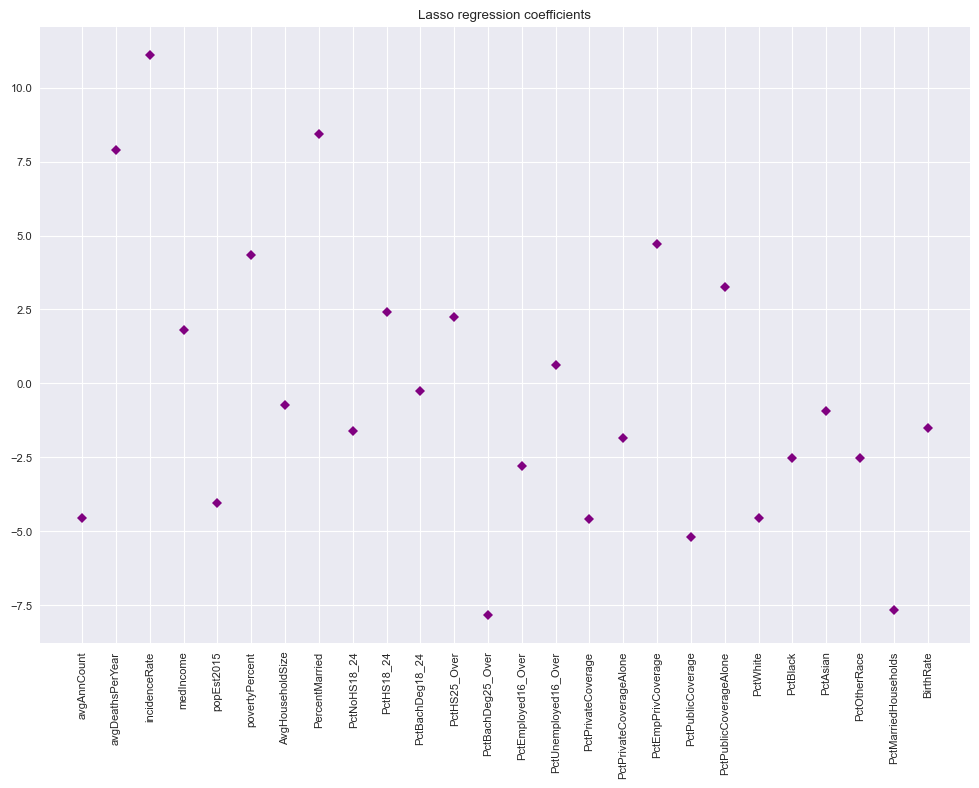

In [368]:
plt.figure(figsize = (12, 8))
plt.title('Lasso regression coefficients')
plt.plot(train_TD.columns, lasso.coef_, linestyle='none', marker='D',color='purple')
plt.xticks(rotation = 'vertical')
plt.show()


In [369]:
features = pd.Series(lasso.coef_, train_TD.columns)

lasso_weights = features.sort_values(ascending=False, key=abs)
print(lasso_weights)

incidenceRate              11.104564
PercentMarried              8.418695
avgDeathsPerYear            7.875378
PctBachDeg25_Over          -7.817649
PctMarriedHouseholds       -7.661446
PctPublicCoverage          -5.177151
PctEmpPrivCoverage          4.702445
PctPrivateCoverage         -4.580435
avgAnnCount                -4.556865
PctWhite                   -4.543561
povertyPercent              4.340853
popEst2015                 -4.050240
PctPublicCoverageAlone      3.272145
PctEmployed16_Over         -2.802686
PctOtherRace               -2.525936
PctBlack                   -2.508445
PctHS18_24                  2.420469
PctHS25_Over                2.262742
PctPrivateCoverageAlone    -1.852456
medIncome                   1.823685
PctNoHS18_24               -1.617001
BirthRate                  -1.498177
PctAsian                   -0.915347
AvgHouseholdSize           -0.717495
PctUnemployed16_Over        0.640505
PctBachDeg18_24            -0.268656
dtype: float64


The features with the highest coefficients are listed above. We can now contrast this with the initial correlation data we obtained during exercise 1 for the linear regression lines below:

In [370]:
comparison = []
head = ["Features", "Exercise 1 Corr", "Lasso"]
weights = pd.Series(lasso.coef_, train_TD.columns)

for x in train_TD:
                                        comparison.append([x, Corr_data[x], weights[x]])

                                        

print(colored(tabulate(comparison, headers=head, tablefmt="fancy_grid"),'green','on_black'))

╒═════════════════════════╤═══════════════════╤═══════════╕
│ Features                │   Exercise 1 Corr │     Lasso │
╞═════════════════════════╪═══════════════════╪═══════════╡
│ avgAnnCount             │        -0.150019  │ -4.55686  │
├─────────────────────────┼───────────────────┼───────────┤
│ avgDeathsPerYear        │        -0.0940476 │  7.87538  │
├─────────────────────────┼───────────────────┼───────────┤
│ incidenceRate           │         0.443983  │ 11.1046   │
├─────────────────────────┼───────────────────┼───────────┤
│ medIncome               │        -0.416607  │  1.82368  │
├─────────────────────────┼───────────────────┼───────────┤
│ popEst2015              │        -0.130122  │ -4.05024  │
├─────────────────────────┼───────────────────┼───────────┤
│ povertyPercent          │         0.41326   │  4.34085  │
├─────────────────────────┼───────────────────┼───────────┤
│ AvgHouseholdSize        │        -0.0455453 │ -0.717495 │
├─────────────────────────┼─────────────

In [371]:
print('Top 5 features obtained using Lasso Regression: \n', lasso_weights[0:5])
print('Initial top 5: \n', top5_Corr)

Top 5 features obtained using Lasso Regression: 
 incidenceRate           11.104564
PercentMarried           8.418695
avgDeathsPerYear         7.875378
PctBachDeg25_Over       -7.817649
PctMarriedHouseholds    -7.661446
dtype: float64
Initial top 5: 
 [PctHS25_Over              0.409915
povertyPercent            0.413260
medIncome                -0.416607
PctPublicCoverageAlone    0.439734
incidenceRate             0.443983
dtype: float64]


You can see that once the features 5 standard deviation outliers were fixed, and those with too many missing data entries were removed, the top 5 correlating features mostly changed. I say mostly, as incidentRate stayed the top correlating feature, but other than that none of the original 5 stayed in. Well while PctHS25_Over was no longer included, PctBachDeg25_Over was, and as these are closely related I would say that feature is still similarly correlating.


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

## **Create a Random Forest Regression model**

Using a Cross validation method to tune the hyperparameters will achieve the best outcome from the random forest. 
To Do this, first a random forest that uses default settings will be compared against a random forest that is subjected to a grid search cross validation. After doing this, you can contrast this with the linear regression models acquired in exercise 3 which shows a small increase in performance using this model.

In [372]:
# Default Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

standard_forest_reg=RandomForestRegressor()
standard_forest_reg.fit(TD_prep, train_TP)

display_performance(standard_forest_reg, TD_prep, cancer_test, train_TP, test_TP)

# Check the scores of the standard random forest regression
scores=cross_val_score(standard_forest_reg, TD_prep, train_TP, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-scores)

print('Scores:', forest_rmse_scores)

TRAIN: Accuracy: 93.41%
TRAIN: Root mean squared error: 7.14
TEST:  Accuracy: 49.18%
TEST:  Root mean squared error: 19.08
Scores: [18.0226167  19.09390092 22.07130711 18.31922491 17.29591302 17.70130351
 20.96266613 19.88430469 15.84892781 20.49489467]


As we want to maximise the performance of this model, we can use grid search cross validation to tune the hyperparameters which will increase the performance. While we want to increase performance, we do not wish to needlessly increase the complexity which in turn increases the run time, therefore we will first use a randomised grid search to help restrict the range of parameters, whose results is then input and used in the grid search. 

In [373]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate

init_param_grid = { 
    'n_estimators': [int(x) for x in range(1, 100)],
    'max_features': [int(x) for x in range(1, 10)],
    'max_depth' : [int(x) for x in np.linspace(1, 110, num = 10)],
    'min_samples_split': [int(x) for x in range(2, 10)],
    'bootstrap': [True, False]
}

forest_reg = RandomForestRegressor()

# n_iter is the number of used during cross validation
grid_search_random = RandomizedSearchCV(forest_reg, init_param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
grid_search_random.fit(TD_prep, train_TP)

# best randomized parameters
grid_search_random.best_params_ 

def get_params(hyperparams, model):
    param_grid = {}

    for parameter in hyperparams:
        value = model.best_params_[parameter]

        if type(value) is int:
            if value > 20:
                # 5 close tuning parameters for best tuning
                param_grid[parameter] = [int(x) for x in np.linspace(value - 10, value + 10, 5)]    
            elif 20 > value > 2:
                # 3 parameters for tuning that are close to the previous best parameter
                param_grid[parameter] = [int(x) for x in np.linspace(value - 2, value + 2, 3)]      
            else:
                param_grid[parameter] = [value]
        else:
            param_grid[parameter] = [value]

    return param_grid

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = get_params(init_param_grid.keys(), grid_search_random)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(TD_prep, train_TP)

forest_reg = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], min_samples_split=grid_search.best_params_['min_samples_split'], max_features=grid_search.best_params_['max_features'], max_depth=grid_search.best_params_['max_depth'], bootstrap=grid_search.best_params_['bootstrap'])
forest_reg.fit(TD_prep, train_TP)

display_performance(forest_reg, TD_prep, cancer_test, train_TP, test_TP)

TRAIN: Accuracy: 96.88%
TRAIN: Root mean squared error: 4.92
TEST:  Accuracy: 49.92%
TEST:  Root mean squared error: 18.94


In [ ]:
# check the best parameters 
grid_search.best_params_

# Check the coefficients
features = pd.Series(grid_search.best_estimator_.feature_importances_, train_TD.columns)

forest_weights = features.sort_values(ascending=False)
print(forest_weights)

incidenceRate              0.190010
PctBachDeg25_Over          0.173106
medIncome                  0.086469
PctHS25_Over               0.057188
PctPublicCoverageAlone     0.046491
povertyPercent             0.039531
avgDeathsPerYear           0.037100
popEst2015                 0.028866
PctUnemployed16_Over       0.027325
PctOtherRace               0.026582
AvgHouseholdSize           0.022968
PctWhite                   0.022297
PctPrivateCoverage         0.022272
PctEmployed16_Over         0.021763
PercentMarried             0.020896
PctMarriedHouseholds       0.020765
PctHS18_24                 0.019634
avgAnnCount                0.019341
PctBlack                   0.018511
BirthRate                  0.016550
PctAsian                   0.016151
PctPublicCoverage          0.014585
PctNoHS18_24               0.013922
PctBachDeg18_24            0.013671
PctPrivateCoverageAlone    0.012625
PctEmpPrivCoverage         0.011384
dtype: float64


After this, the models performance has been improved for the test set. The forest regression model is the best performing model in comparison to all the prior models, including the previous forest regression model. This results in all the coefficients having been minimised by said model.

#### **Comparing weights**

Firstly, create a table that compares the weights from the lasso model and the random regression forest. It can be seen that the coefficints are different in relevance and scale. While the Lasso model has a large range of values for the weights, the forest regression model scaled all of the weights to positive values less than 0.2.

In [ ]:
model_regression_table = []
model_regression_head = ["Weight Name", "Lasso Weight", "Random Forest Weight"]

for i in range(train_TD.columns.size):
    model_regression_table.append([train_TD.columns[i], lasso.coef_[i], grid_search.best_estimator_.feature_importances_[i]])

print(colored(tabulate(model_regression_table, headers=model_regression_head, tablefmt="fancy_grid"),'green','on_black'))

╒═════════════════════════╤════════════════╤════════════════════════╕
│ Weight Name             │   Lasso Weight │   Random Forest Weight │
╞═════════════════════════╪════════════════╪════════════════════════╡
│ avgAnnCount             │      -4.55686  │              0.0193407 │
├─────────────────────────┼────────────────┼────────────────────────┤
│ avgDeathsPerYear        │       7.87538  │              0.0371004 │
├─────────────────────────┼────────────────┼────────────────────────┤
│ incidenceRate           │      11.1046   │              0.19001   │
├─────────────────────────┼────────────────┼────────────────────────┤
│ medIncome               │       1.82368  │              0.0864685 │
├─────────────────────────┼────────────────┼────────────────────────┤
│ popEst2015              │      -4.05024  │              0.0288657 │
├─────────────────────────┼────────────────┼────────────────────────┤
│ povertyPercent          │       4.34085  │              0.0395306 │
├───────────────────

#### **Comment on the most important features**
Two features appear in the top 5 weights for the models, with the Random Forest Regression model having 4 in the top 5 features shared with the linear correlation coefficients found within exercise 1.

In [ ]:
forest_weights[0:5]

incidenceRate             0.190010
PctBachDeg25_Over         0.173106
medIncome                 0.086469
PctHS25_Over              0.057188
PctPublicCoverageAlone    0.046491
dtype: float64

- It can be noticed that the top 5 in the Random forest are:
  - **incidenceRate**
  - **PctBachDeg25_Over**
  - PctHS25_Over  
  - medIncome 
  - PctPublicCoverageAlone

- In comparison, the top 5 for Lasso are as follows:
  - **incidenceRate** 
  - PercentMarried 
  - avrDeathsPerYear
  - **PctBachDeg25_Over** 
  - PctMarriedHouseholds 

From this, you can see that the between the two, there are only 2 similar features. These are incidentRate, which takes the top for each, and PctBachDeg25_Over, which is present in both at 2 and 4 respectively. This makes sense as within the initial dataset, both of these had high correlations, and thus they would logically have a higher weight in the process.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [ ]:
from sklearn.metrics import accuracy_score

## Read in the provided example test data
TestD_path = 'Test_data_example.csv'
TargetP_path ='Test_data_example_targets.csv'

TestD = pd.read_csv(TestD_path)
TestT = pd.read_csv(TargetP_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

In [ ]:
#Double check target does not contain null/missing values
if (TestT.isnull().values.any() == False):
    # Prep data
    X_train_1, X_train_2, y_train_1, y_train_2 = preprocess(TD, TP)
    X_train = pd.concat([X_train_1, X_train_2])
    y_train = pd.concat([y_train_1, y_train_2])

# Change the name of the test data
    X_test = TestD
    y_test = TestT

    # Return arrays
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()

   # remove that columns in test set that aren't shared across the test & train set
    for column in TestD.columns: 
        if {column}.issubset(X_train.columns) == False and {column}.issubset(X_test.columns):
            X_test = X_test.drop(column,axis=1)

    # Create the pipeline
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)
    
    # Model Fit
    init_params = { 
    'n_estimators': [int(x) for x in range(1, 100)],
    'max_features': [int(x) for x in range(1, 10)],
    'max_depth' : [int(x) for x in np.linspace(1, 110, num = 10)],
    'min_samples_split': [int(x) for x in range(2, 10)],
    'bootstrap': [True, False]
    }
    #Forest Regression Model = FR_model
    FR_model = RandomForestRegressor()

    SearchRandom = RandomizedSearchCV(FR_model, init_params, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    SearchRandom.fit(X_train, y_train)

    params = get_params(init_params.keys(), SearchRandom)
    search = GridSearchCV(forest_reg, params, cv=5, scoring='neg_mean_squared_error')
    search.fit(X_train, y_train)

    forest_reg = RandomForestRegressor(n_estimators=search.best_params_['n_estimators'], min_samples_split=search.best_params_['min_samples_split'], max_features=search.best_params_['max_features'], max_depth=search.best_params_['max_depth'], bootstrap=search.best_params_['bootstrap'])
    forest_reg.fit(X_train, y_train)

    # Display performance
    display_performance(search, X_train, X_test, y_train, y_test)

else:
    print('The target set contains null values. [Empty]')


TRAIN: Accuracy: 98.82%
TRAIN: Root mean squared error: 2.99
TEST:  Accuracy: 42.76%
TEST:  Root mean squared error: 20.81
